# EXPLORADATOS 2023 

**Qué es?** Es una expedición de datos abiertos en que el Distrito hace un llamado a la ciudadanía a que explore las BDD abiertos del Distrito y las relacione con sus temáticas de interés en el marco del cumplimiento de los Objetivos de Desarrollo Sostenible(ODS).

Iniciativa del Distrito de Bogotá -2023

### ODC:  Adoptar medidas urgentes para combatir el cambio climático y sus efectos
Aspira a reforzar la respuesta mundial a la amenaza del cambio climático manteniendo el aumento global de la temperatura durante este siglo muy por debajo de 2 grados Celsius con respecto a los niveles preindustriales. El acuerdo también aspira a reforzar la capacidad de los países para lidiar con los efectos del cambio climático mediante flujos financieros apropiados, un nuevo marco tecnológico y un marco de desarrollo de la capacidad mejorado.

Fuente: __[Onu climate-change](https://www.un.org/sustainabledevelopment/es/climate-change-2/)__



***

<div class="alert alert-block alert-info">
<b>Descripción del documento: </b>El siguiente documento fue desarrollado como iniciativa civil por Olga Barrios, residente de la Ciudad de Bogotá en el año 2023 como propuesta de apoyo a empresas de economía circular y concientización ciudadana del beneficio de reciclar y gestionar adecuadamente las básuras.
</div>

***
#### 1. ¿Cómo se distribuyen las básuras en la ciudad y qué tipo de desechos se generan?

Estudio socioeconomico de generación de residuos.

In [1]:
###librerias
#!pip install ydata_profiling # para sacar perfil de datos
#!pip install --upgrade ipywidgets
#!pip install geopandas fiona shapely #para leer gpkg formato de geolocalizacion
#pip install openpyxl #Para leer mejor los exceles
#pip install selenium #Para el webscraping
#pip install chromium-chromedrive

In [188]:
from ydata_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import re

import seaborn as sns # stadistical data visualization
import matplotlib.pyplot as plt #

In [189]:
import geopandas as gpd

# Reading a GeoPackage file
#https://datosabiertos.bogota.gov.co/dataset/localidad-bogota-d-c
input_file = "./DATA_SET/IDLOCALIDADES.gpkg"
IDlocalidades = gpd.read_file(input_file)
ID_LOCALIDAD_NOMBRE = IDlocalidades[['LocCodigo','LocNombre']]
ID_LOCALIDAD_NOMBRE.columns = ['IDLOCALID', 'LocNombre']
ID_LOCALIDAD_NOMBRE['IDLOCALID'] = ID_LOCALIDAD_NOMBRE['IDLOCALID'].astype(str).astype(int)
ID_LOCALIDAD_NOMBRE =  ID_LOCALIDAD_NOMBRE.sort_values(by=['IDLOCALID']).reset_index(drop= True)

<ipython-input-189-1049ff303e03>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ID_LOCALIDAD_NOMBRE['IDLOCALID'] = ID_LOCALIDAD_NOMBRE['IDLOCALID'].astype(str).astype(int)


In [190]:
#1.Base de datos de instalacions cestas 2016
#Link_Cestas = "https://datosabiertos.bogota.gov.co/dataset/sigab-junio-2023/resource/3c7e7629-6f6e-4086-84a0-bf090bd798c5"
Cestas = pd.read_csv('./DATA_SET/sigab_cestas.csv', sep = '|',error_bad_lines=False, encoding='unicode_escape')
print(Cestas.shape)

(100474, 17)


b'Skipping line 24407: expected 17 fields, saw 18\nSkipping line 28789: expected 17 fields, saw 18\n'
c:\users\oluci\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [191]:
#Lugares donde se generan mas residuos
#Link_Grandes_generadores = "https://datosabiertos.bogota.gov.co/dataset/sigab-junio-2023/resource/8ab5848c-dfcb-42f9-9bf5-b0acb5b0be58"
Grandes_Generadores = pd.read_csv('./DATA_SET/sigab_grandesgeneradores.csv', sep ='|',error_bad_lines=False, encoding='unicode_escape')
print(Grandes_Generadores.shape)

(7388, 7)


In [192]:
##-----------------------------------------------------------------------------##
##Objetivo: contar el número de cestas por localidad
Cestas_loc = Cestas.groupby(['IDLOCALID'])['IDLOCALID']
Cestas_loc = pd.DataFrame(Cestas_loc.size().reset_index(name = "Num_cestas"))
#Cestas_loc['Num_cestas'].sum()
##-----------------------------------------------------------------------------##
##Objetivo: Contar el número de grandes generadores por localidad
Grandes_generadores_loc = Grandes_Generadores.groupby(['IDLOCALID'])['NOMBRE'].count().reset_index(name = "Num_generadores")

In [193]:
#Población por localidad
#Link= https://www.dane.gov.co/index.php/estadisticas-por-tema/demografia-y-poblacion/proyecciones-de-poblacion/proyecciones-de-poblacion-bogota
Poblacion = pd.read_excel('./DATA_SET/anexo-proyecciones-poblacion-bogota-desagreacion-loc-2018-2035-UPZ-2018-2024.xlsx',
                          sheet_name= 'UPZ Bogota 2018_2024', skiprows=7,
                          engine='openpyxl')
Poblacion = Poblacion.dropna(axis=0)
Poblacion.drop(['UPZ', 'Hombres_0-4', 'Hombres_5-9',
       'Hombres_10-14', 'Hombres_15-19', 'Hombres_20-24', 'Hombres_25-29',
       'Hombres_30-34', 'Hombres_35-39', 'Hombres_40-44', 'Hombres_45-49',
       'Hombres_50-54', 'Hombres_55-59', 'Hombres_60-64', 'Hombres_65-69',
       'Hombres_70-74', 'Hombres_75-79', 'Hombres_80-84', 'Hombres_85-89',
       'Hombres_90-94', 'Hombres_95-99', 'Hombres_100+', 'Mujeres_0-4',
       'Mujeres_5-9', 'Mujeres_10-14', 'Mujeres_15-19', 'Mujeres_20-24',
       'Mujeres_25-29', 'Mujeres_30-34', 'Mujeres_35-39', 'Mujeres_40-44',
       'Mujeres_45-49', 'Mujeres_50-54', 'Mujeres_55-59', 'Mujeres_60-64',
       'Mujeres_65-69', 'Mujeres_70-74', 'Mujeres_75-79', 'Mujeres_80-84',
       'Mujeres_85-89', 'Mujeres_90-94', 'Mujeres_95-99', 'Mujeres_100+',
       'Total_0-4', 'Total_5-9', 'Total_10-14', 'Total_15-19', 'Total_20-24',
       'Total_25-29', 'Total_30-34', 'Total_35-39', 'Total_40-44',
       'Total_45-49', 'Total_50-54', 'Total_55-59', 'Total_60-64',
       'Total_65-69', 'Total_70-74', 'Total_75-79', 'Total_80-84',
       'Total_85-89', 'Total_90-94', 'Total_95-99', 'Total_100+',
       'Total_Hombres', 'Total_Mujeres'], inplace=True, axis=1)

Poblacion_loc = Poblacion.groupby(['LOC','AÑO'])['Total'].sum().reset_index()
Poblacion_2023 = Poblacion_loc[(Poblacion_loc['AÑO'] == 2023)]
Poblacion_2023.columns = [ 'IDLOCALID','AÑO', 'Total_Pob']
Poblacion_2023 = Poblacion_2023.reset_index(drop=True )

In [194]:
result = pd.concat([ ID_LOCALIDAD_NOMBRE, Cestas_loc, Grandes_generadores_loc,Poblacion_2023], axis=1, ignore_index= False)
result.columns = 'IDLOCALID', 'LocNombre', 'IDLOCALID_2', 'Num_cestas', 'IDLOCALID_3','Num_generadores', 'IDLOCALID_4', 'AÑO', 'Total_Pob'
result.drop(['IDLOCALID_2', 'IDLOCALID_3', 'IDLOCALID_4'], inplace=True, axis=1)

## Creación de nuevas variables

result['Porcen_pob'] = [i*100/result.Total_Pob.sum() for i in result.Total_Pob]
result['Porcen_genra'] = [i*100/result.Num_generadores.sum() for i in result.Num_generadores]
result.drop(['AÑO'], inplace=True, axis=1)
result = result.drop([19])
result

IDLOCALID           LocNombre  Num_cestas  Num_generadores  Total_Pob  \
0           1             USAQUEN        6762             90.0   586346.0   
1           2           CHAPINERO        5636             47.0   178317.0   
2           3            SANTA FE        1379             29.0   106587.0   
3           4       SAN CRISTOBAL        2285             39.0   406428.0   
4           5                USME        2569              8.0   397603.0   
5           6          TUNJUELITO        1865             16.0   182943.0   
6           7                BOSA        4180              8.0   729781.0   
7           8             KENNEDY       13302           2036.0  1035224.0   
8           9            FONTIBON        6943           1300.0   404252.0   
9          10            ENGATIVA        9947              0.0   817019.0   
10         11                SUBA       16541           1012.0  1290144.0   
11         12      BARRIOS UNIDOS        4156              0.0   153342.0   
12         13         TEUSAQUILLO        5556              5.0   166428.0   
13         14        LOS MARTIRES        3157              2.0    82848.0   
14         15      ANTONIO NARIÑO        2356              2.0    83925.0   
15         16       PUENTE ARANDA        6615             37.0   256731.0   
16         17          CANDELARIA         356              4.0    18409.0   
17         18  RAFAEL URIBE URIBE        2892              5.0   389238.0   
18         19      CIUDAD BOLIVAR        3953             11.0   650967.0   

    Porcen_pob  Porcen_genra  
0     7.387937      1.935068  
1     2.246787      1.010535  
2     1.342992      0.623522  
3     5.120977      0.838529  
4     5.009783      0.172006  
5     2.305075      0.344012  
6     9.195213      0.172006  
7    13.043783     43.775532  
8     5.093560     27.950978  
9    10.294408      0.000000  
10   16.255765     21.758762  
11    1.932103      0.000000  
12    2.096986      0.107504  
13    1.043882      0.043002  
14    1.057452      0.043002  
15    3.234801      0.795528  
16    0.231953      0.086003  
17    4.904384      0.107504  
18    8.202159      0.236508

<AxesSubplot:>

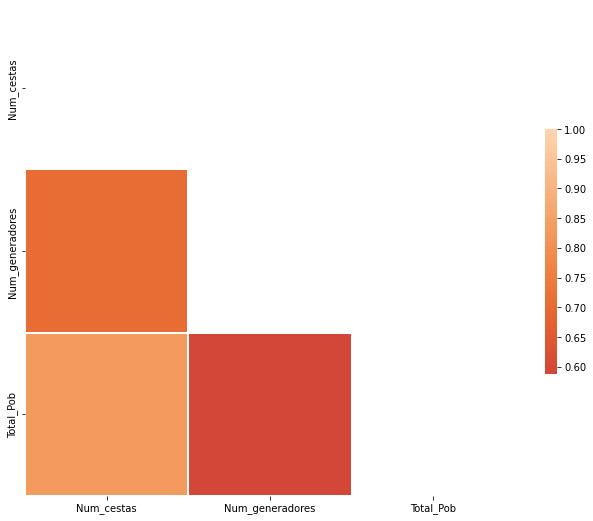

In [195]:
## correlación entre variables
result_modif = result.copy()
result_modif.drop(['IDLOCALID', 'LocNombre', 'Porcen_pob','Porcen_genra'], inplace=True, axis=1)
correlacion = result_modif.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlacion, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(20, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlacion, mask=mask,  vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})

No se observa una correlación fuerte entre las variables de población con los Grandes generadores, pero si una correlacón con el número de Cestas colocadas en cada localidad, lo cual es una relación entre población y cestas de básura.

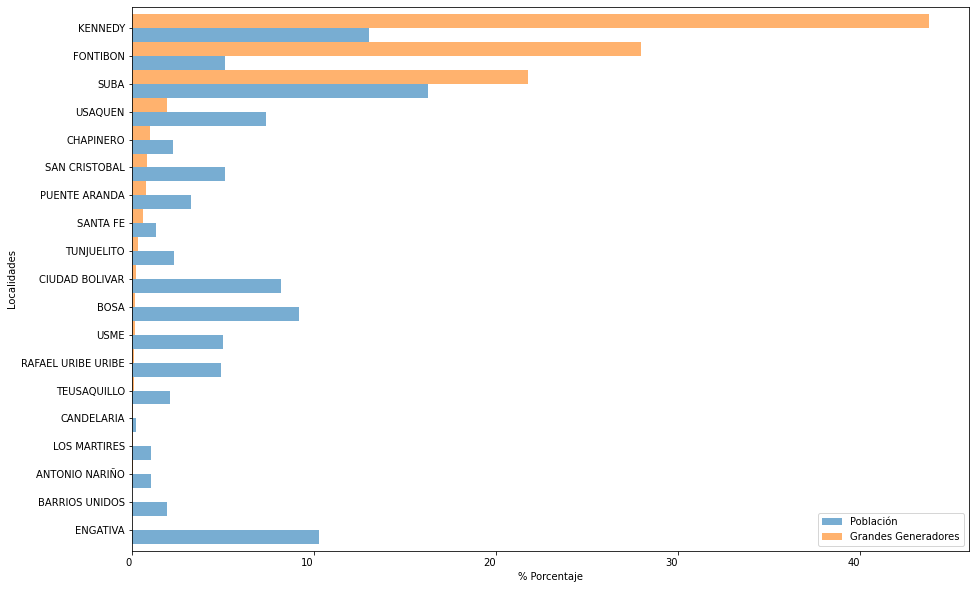

In [196]:
from matplotlib import ticker

result = result.sort_values(by=['Porcen_genra'])
result.loc[:,['LocNombre','Porcen_pob','Porcen_genra']].plot(kind='barh',x ='LocNombre',
                                                             alpha= 0.6, width = 1,
                                                             figsize=(15, 10))

plt.ylabel('Localidades')
plt.xlabel('% Porcentaje')
plt.legend(["Población", "Grandes Generadores"], fontsize = 10)
plt.xticks(
    rotation=0,
    horizontalalignment='right'
)
plt.show()

Las localidades con mayor porcentaje de generadores de  básura son Kennedy (43.7%), Fontibón(27.9%) y Suba (21.7%). Las cuales no corresponden localidades más pobladas. Por ejemplo la localidad más poblada, Suba (16.2%), tiene el 21% de los grandes generadores de residuos.  

*Análisis y modelo de predicción de Básuras*

In [197]:
#lINK DE LA INFORMACIPÓN: https://datosabiertos.bogota.gov.co/dataset?q=RBL+Residuos+junio&ext_bbox=&ext_prev_extent=
## --- Recolección de basura 2022----#
RBL_ene_22 = pd.read_excel('./DATA_SET/RBL-set-enero-2022.xlsx', engine='openpyxl')
RBL_mar_22 = pd.read_excel('./DATA_SET/RBL-set-marzo-2022.xlsx', engine = 'openpyxl')
RBL_abr_22 = pd.read_excel('./DATA_SET/RBL-set-abril-2022.xlsx', engine='openpyxl')
RBL_may_22 = pd.read_excel('./DATA_SET/RBL-set-mayo-2022.xlsx', engine='openpyxl',header=1)
RBL_jun_22 = pd.read_excel('./DATA_SET/RBL-set-junio-2022.xlsx', engine='openpyxl')
RBL_jul_22 = pd.read_excel('./DATA_SET/RBL-set-julio-2022.xlsx',engine = 'openpyxl')
RBL_ago_22 = pd.read_excel('./DATA_SET/RBL-set-agosto-2022.xlsx', engine='openpyxl')
RBL_sep_22 = pd.read_excel('./DATA_SET/RBL-set-septiembre-2022.xlsx', engine='openpyxl')
RBL_oct_22 = pd.read_excel('./DATA_SET/RBL-set-octubre-2022.xlsx', engine='openpyxl')
RBL_nov_22 = pd.read_excel('./DATA_SET/RBL-set-noviembre-2022.xlsx', engine='openpyxl')
## --- Recolección de basura 2023----#
RBL_ene_23 = pd.read_excel('./DATA_SET/RBL-set-enero-2023.xlsx', engine='openpyxl')
RBL_feb_23 = pd.read_excel('./DATA_SET/RBL-set-feb-2023.xlsx', engine='openpyxl')
RBL_abr_23 = pd.read_excel('./DATA_SET/RBL-set-abril-2023.xlsx', engine='openpyxl')
RBL_may_23 = pd.read_excel('./DATA_SET/RBL-set-mayo-2023.xlsx', engine='openpyxl')
RBL_jul_23 = pd.read_excel('./DATA_SET/RBL-set-julio-2023.xlsx', engine='openpyxl')

In [198]:
RBL_nov_22.rename(columns={'Año/Mes Formato (dd-mmm-yy)': 'Ano/Mes Formato (dd-mmm-yy)'}, inplace=True)
RBL_2022 = [RBL_mar_22,RBL_abr_22,RBL_may_22,RBL_jun_22,RBL_jul_22,RBL_ago_22,
           RBL_sep_22,RBL_oct_22,RBL_nov_22,RBL_ene_23,RBL_feb_23,RBL_abr_23,RBL_may_23, RBL_jul_23 ]
Residuos_select = ['[Rr]esiduos Recogidos Domiciliarios', 
'Residuos de Recogidos de Grandes Generadores',
'Total Residuos Recogidos','Recoleccion de Arrojo Clandestino( )?\(Atencion']

In [199]:
fecha = RBL_ene_22['Ano/Mes Formato (dd-mmm-yy)'].unique()[0]
columnas = RBL_ene_22.columns.to_list()
value = []
value.append([0])
for frase in Residuos_select:
    value.append(np.where(np.array([ re.search(frase , ii) for ii in columnas ])!= None)[0].tolist())
Analisis_RBL = RBL_ene_22[RBL_ene_22['Ano/Mes Formato (dd-mmm-yy)'] == RBL_ene_22['Ano/Mes Formato (dd-mmm-yy)'].unique()[1] ].iloc[:, sum(value, [])]
Analisis_RBL = Analisis_RBL.replace(to_replace=r'Total Toneladas', value= fecha, regex=True)
Analisis_RBL  = Analisis_RBL.rename(columns=lambda x: re.sub('\(t(oneladas)?( )?/mes\)','',x))

for RBL in RBL_2022:
    RBL = RBL.rename(columns=lambda x: re.sub('Año','Ano',x))
    RBL = RBL.rename(columns=lambda x: re.sub('ó','o',x))
    RBL = RBL.rename(columns=lambda x: re.sub('í','i',x))
    fecha = RBL['Ano/Mes Formato (dd-mmm-yy)'].unique()[0]
    columnas = RBL.columns.to_list()
    value = []
    value.append([0])
    for frase in Residuos_select:
        value.append(np.where(np.array([ re.search(frase , ii) for ii in columnas ])!= None)[0].tolist())
    A_RBL = RBL[RBL['Ano/Mes Formato (dd-mmm-yy)'] == RBL['Ano/Mes Formato (dd-mmm-yy)'].unique()[1] ].iloc[:, sum(value, [])]
    A_RBL = A_RBL.replace(to_replace=r'Total Toneladas', value= fecha, regex=True)
    A_RBL = A_RBL.rename(columns=lambda x: re.sub('\(t(oneladas)?( )?/mes\)','',x))
    Analisis_RBL =  pd.concat([Analisis_RBL, A_RBL])
    print(fecha)
    
Analisis_RBL = Analisis_RBL.reset_index(drop=True)

2022-03-01 00:00:00
2022-04-01 00:00:00
2022-05-01 00:00:00
2022-06-01 00:00:00
2022-07-01 00:00:00
2022-08-01 00:00:00
2022-09-01 00:00:00
2022-10-01 00:00:00
2022-11-01 00:00:00
2023-01-01 00:00:00
2023-02-01 00:00:00
2023-04-01 00:00:00
2023-05-01 00:00:00
2023-07-01 00:00:00


In [200]:
Analisis_RBL.columns

Index(['Ano/Mes Formato (dd-mmm-yy)', 'Residuos Recogidos Domiciliarios  ',
       'Residuos de Recogidos de Grandes Generadores  ',
       'Total Residuos Recogidos  ',
       'Recoleccion de Arrojo Clandestino (Atencion criticos clandestinos y otros1077, recoleccion residuos voluminosos, residuos clandestinos indisciplinados) ',
       'Total Residuos Recogidos  + Total residuos de arrojo clandestino en Punto Limpio'],
      dtype='object')

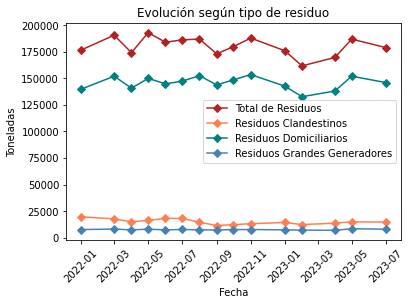

In [201]:
# Plotting both the curves simultaneously
plt.plot(Analisis_RBL['Ano/Mes Formato (dd-mmm-yy)'], Analisis_RBL[ 'Total Residuos Recogidos  '],
         '-gD' ,color='firebrick', label='Total de Residuos')
plt.plot(Analisis_RBL['Ano/Mes Formato (dd-mmm-yy)'], Analisis_RBL['Recoleccion de Arrojo Clandestino (Atencion criticos clandestinos y otros1077, recoleccion residuos voluminosos, residuos clandestinos indisciplinados) '],
         '-gD' ,color='coral', label='Residuos Clandestinos')
plt.plot(Analisis_RBL['Ano/Mes Formato (dd-mmm-yy)'], Analisis_RBL['Residuos Recogidos Domiciliarios  '],
         '-gD' ,color='teal', label='Residuos Domiciliarios')
plt.plot(Analisis_RBL['Ano/Mes Formato (dd-mmm-yy)'], Analisis_RBL['Residuos de Recogidos de Grandes Generadores  '],
         '-gD' ,color='steelblue', label='Residuos Grandes Generadores')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Fecha")
plt.ylabel("Toneladas")
plt.title("Evolución según tipo de residuo")
plt.xticks(rotation = 45) 
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [204]:
Analisis_RBL.mean().to_frame()

<ipython-input-204-b08d5df2a00f>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Analisis_RBL.mean().to_frame()


0
Residuos Recogidos Domiciliarios                    145642.292667
Residuos de Recogidos de Grandes Generadores          7624.266667
Total Residuos Recogidos                            180381.814000
Recoleccion de Arrojo Clandestino (Atencion cri...   15091.561333
Total Residuos Recogidos  + Total residuos de a...  186529.139000

In [205]:
7624.266667*100/145642.292667

5.234926289187375

In [19]:
prof = ProfileReport(Analisis_RBL,title="Profiling Report", explorative=True)
#prof.to_file("output.html") #Para guardarlo
prof


***
#### 2. Manejo y gestión actual de los centros de acopio. ¿Cómo se puede valorisar el reciclaje?

Ubicación, gestión y rentabilidad del reciclaje.


In [1]:
# Import GeoPandas
import geopandas
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [185]:
# Read Images
#Leido el : 10/09/2023
#https://www.google.com/search?sca_esv=564233762&rlz=1C1CHBF_esCO876CO876&tbs=lf:1,lf_ui:2&tbm=lcl&sxsrf=AB5stBgqRZTzLppuG2t6MhA2hLOzyihiQg:1694398696304&q=centros+de+acopio+bogota&rflfq=1&num=10&sa=X&sqi=2&ved=2ahUKEwiCspqDv6GBAxWrSzABHdWkBQAQjGp6BAgZEAE&biw=1600&bih=704&dpr=1.2#rlfi=hd:;si:;mv:[[4.801429499999999,-74.0148063],[4.4757548,-74.1516865]];tbs:lrf:!1m4!1u3!2m2!3m1!1e1!1m4!1u2!2m2!2m1!1e1!2m1!1e2!2m1!1e3!3sIAE,lf:1,lf_ui:2
img = mpimg.imread('./DATA_SET/CENTROS_ACOPIO_2.jpg.png')
districts = geopandas.read_file('./DATA_SET/IDLOCALIDADES.gpkg')
districts = districts.drop(8).reset_index(drop =True)

<ipython-input-187-217794234734>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['LocCodigo'], xy=row['coords'], horizontalalignment='center', color='black')


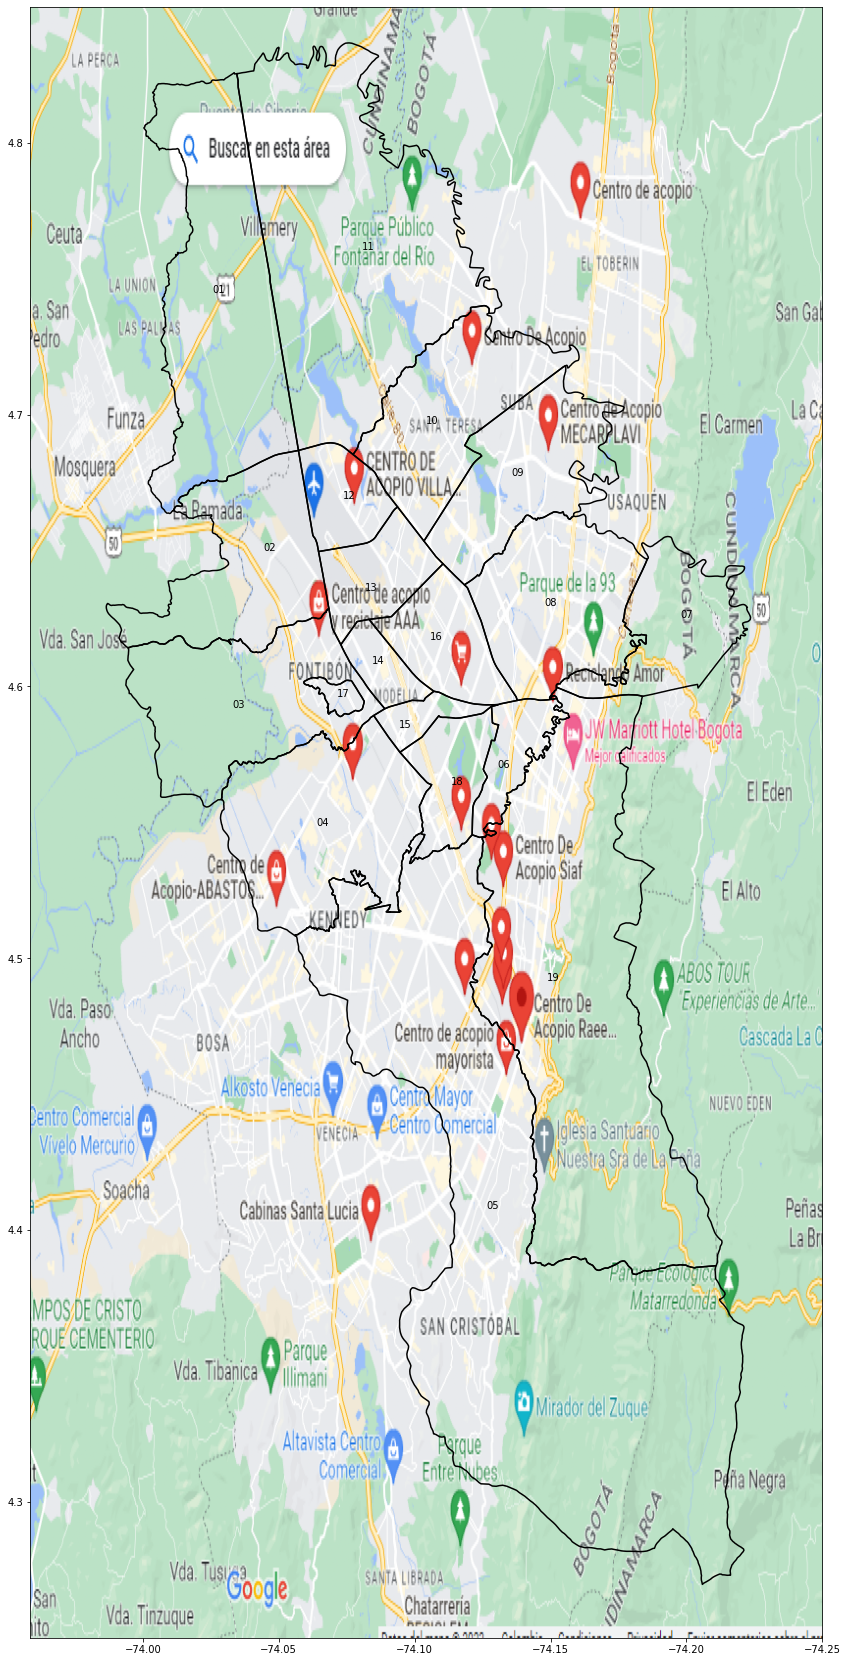

In [187]:

districts['coords'] = districts['geometry'].apply(lambda x: x.representative_point().coords[:])
districts['coords'] = [coords[0] for coords in districts['coords']]
fig, ax = plt.subplots(figsize =(30,30))
districts.boundary.plot(ax=ax,edgecolor='black')
ax.set_aspect("equal")
for idx, row in districts.iterrows():
    plt.annotate(s=row['LocCodigo'], xy=row['coords'], horizontalalignment='center', color='black')
    # Output Images

    
#---------------------------------
im = ax.imshow(
    img,
    extent=(-73.9585, -74.25, 4.25, 4.85), #Izquierda, derecha, abajo, arriba
    zorder=1
) 

# plot map
#plt.show()

***
#### 3. Análisis de emprendimientos que hacen uso de la económia circular.



3. Analisis de emprendimientos de económia circular

### <span style="color:green">Conclusiones generales</span> 


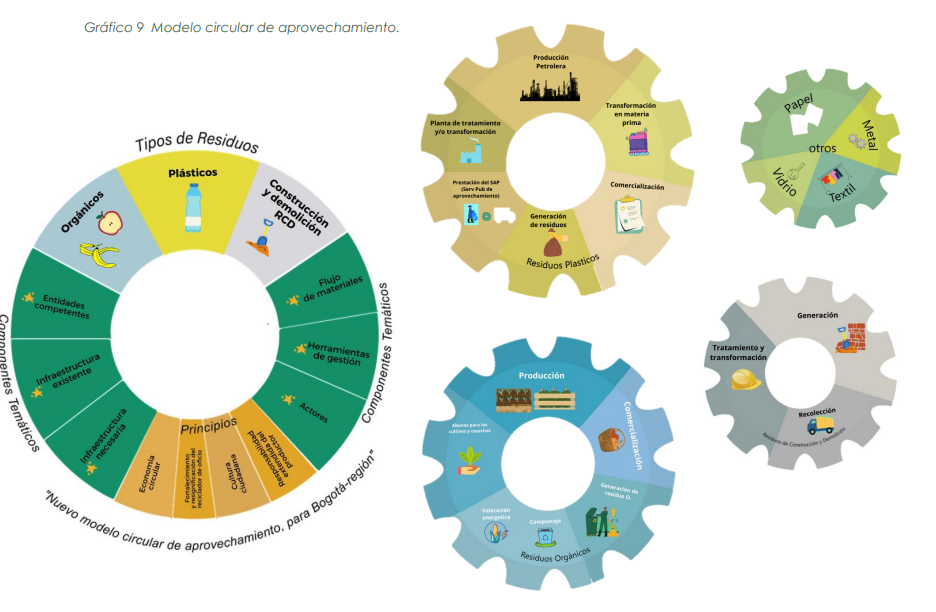